In our discussion of data engineering, we have ventured from production grade databases, the optimization of SQL tables, learning about data structures and algorithms, and then using these concepts to write better code. Within each of these topics, we have learned how they work in isolation, but not how they fit together as a whole. We are at the point in our discussion where we can introduce the system that ties everything together.

This piece of the data engineering puzzle is the data pipeline. A data pipeline is a sequence of tasks. Each task takes in an input, and then returns an output that is used in the next task.

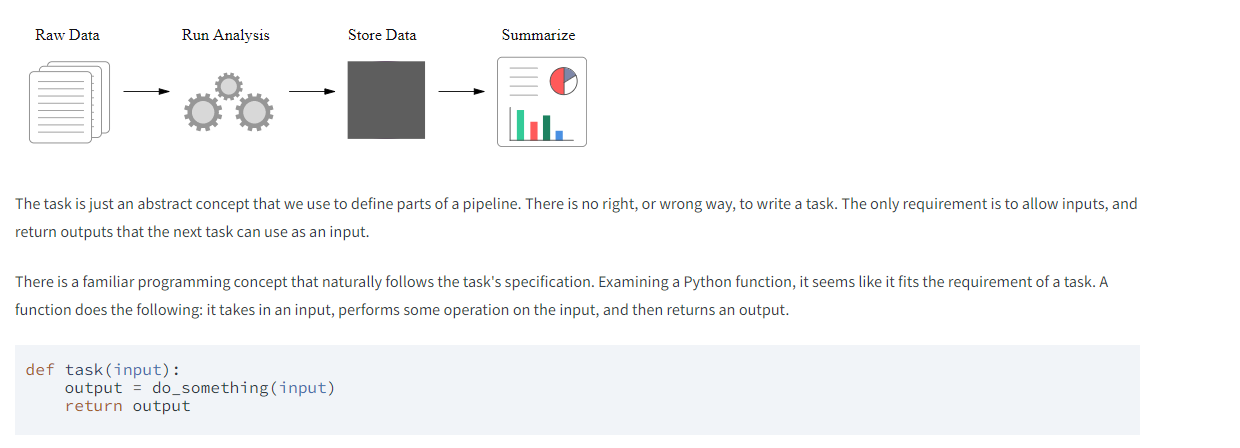

While trivial, this example of a function demonstrates its ability to conform to the task specification. If it can conform to the specification of a task, then perhaps it can be used for other higher level concepts?

In this file, we will describe a new paradigm of programming called **functional programming**. We will compare it with **object-oriented programming** (classes, objects, and state), and show how Python gives us the ability to switch between the two. Finally, we will finish the discussion by linking functional programming with data pipelines.

Let's run through an example of how we have been writing our programs so far.

Suppose we wanted to create a line counter class that took in a file, read each line, then counts the amount of lines. The class could look something like the following:

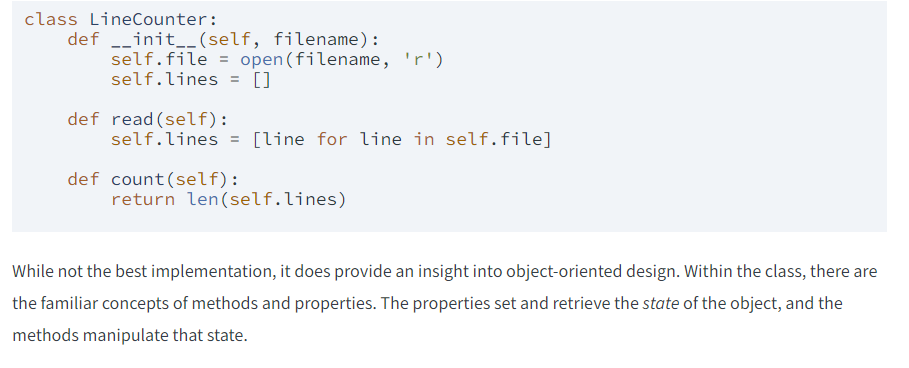

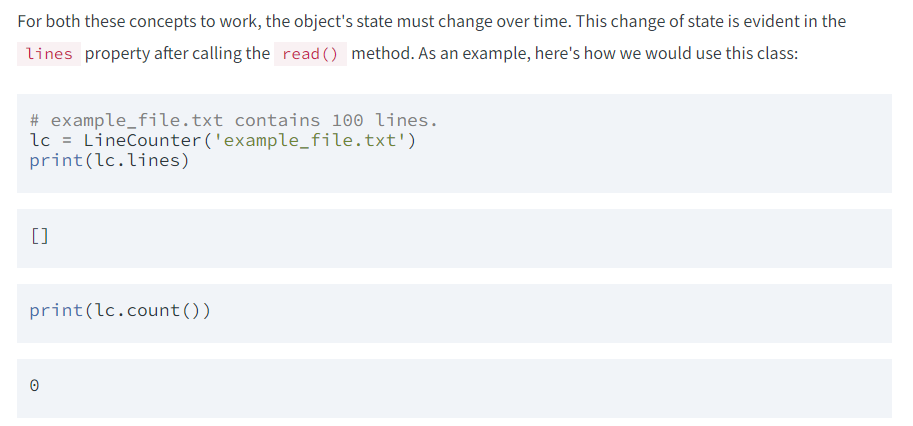

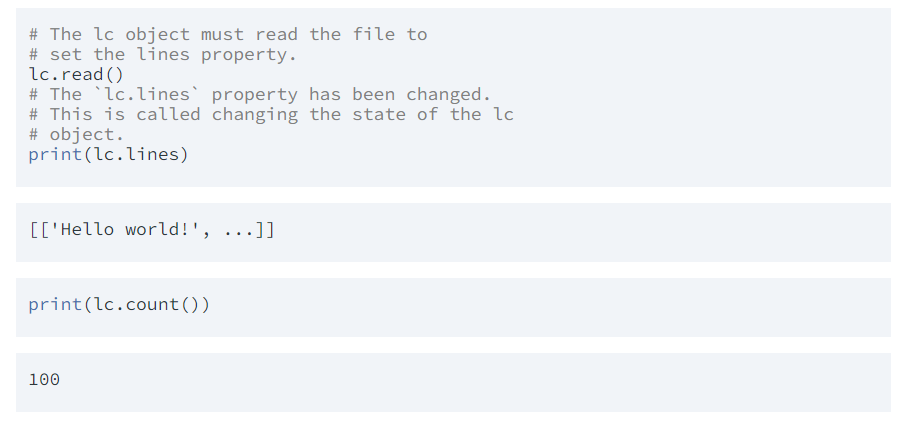

The ever changing state of an object is both its blessing and curse. To understand why a changing state can be seen as a negative, we have to introduce an alternative. The alternative is to build the line counter as a series of independent functions.

In the exercise, we'll be using an example **log** file containing log lines from a web server. We will explain the file in more detail later, but, for now, think of it as a file containing a list of devices that have accessed a website.

**Task**

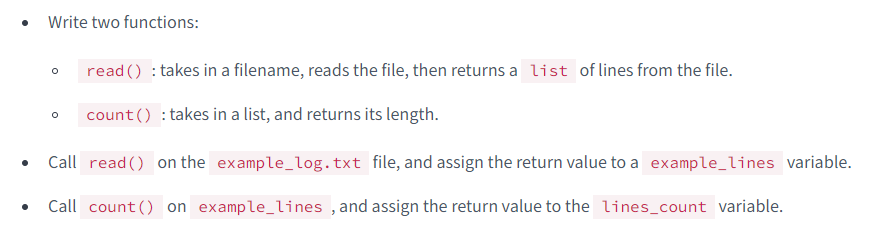

**Answer**

In [1]:
def read(filename):
    with open(filename, 'r') as f:
        return [line for line in f]

def count(lines):
    return len(lines)

example_lines = read('example_log.txt')
lines_count = count(example_lines)

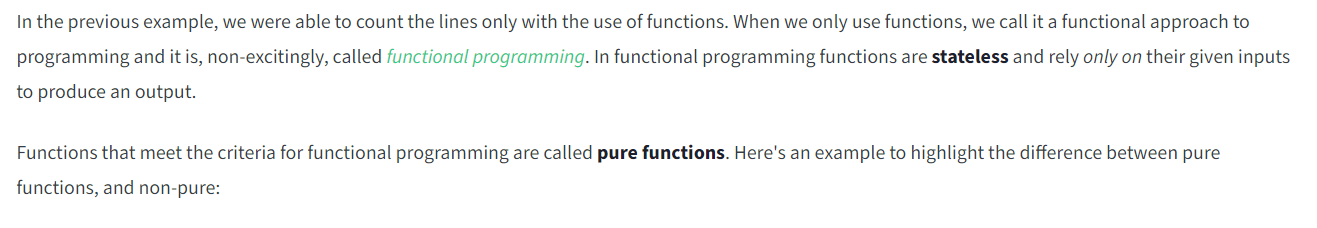

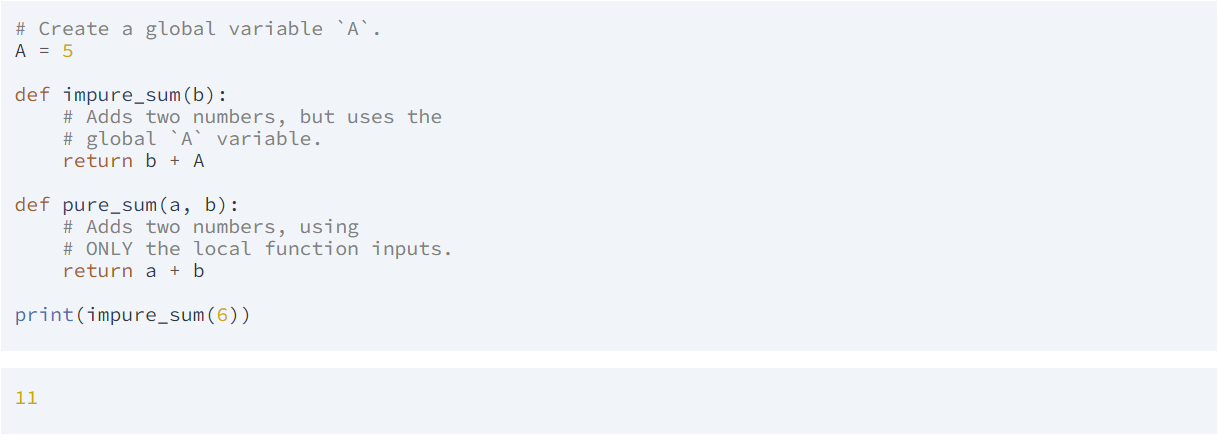

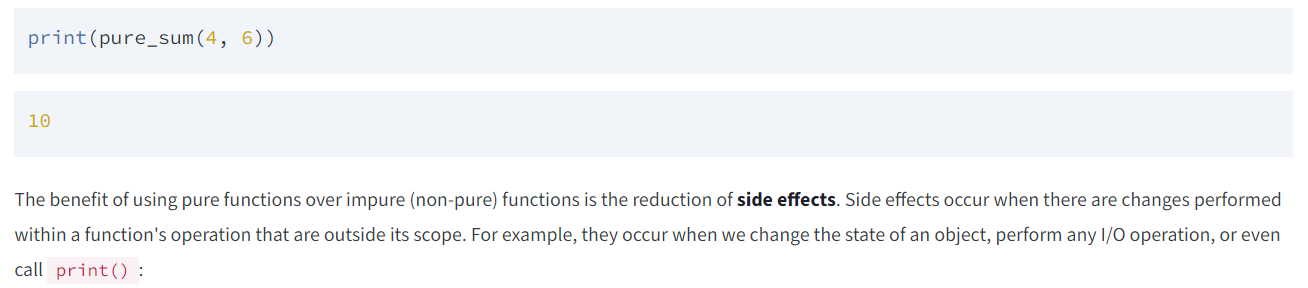

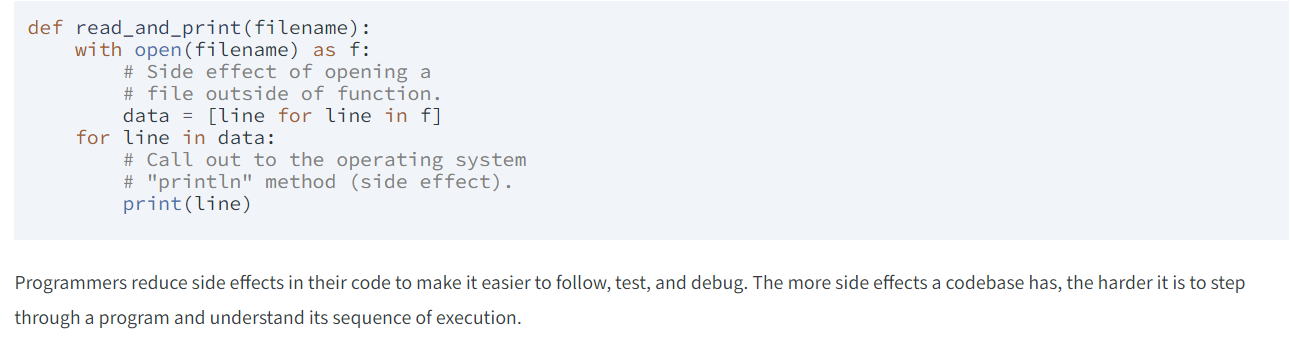

While it's convenient to try and eliminate all side effects, they're often used to make programming easier. If we were to ban all side effects, then we wouldn't be able to read in a file, call print, or even assign a variable within a function. Advocates for functional programming understand this tradeoff, and try to eliminate side effects where possible without sacrificing development implementation time.

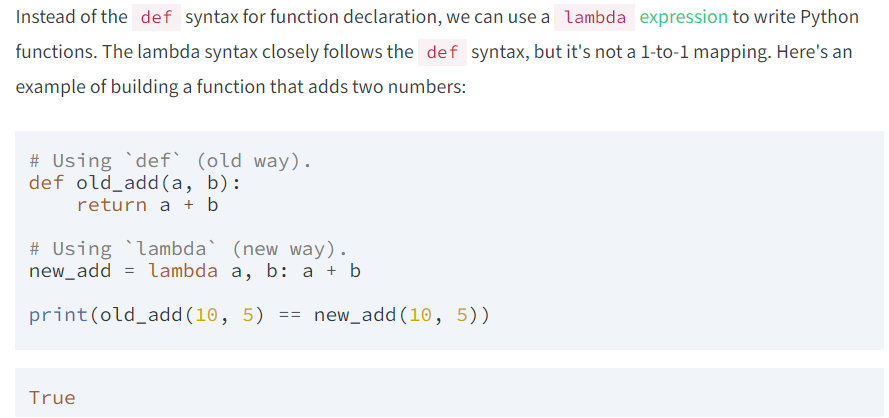

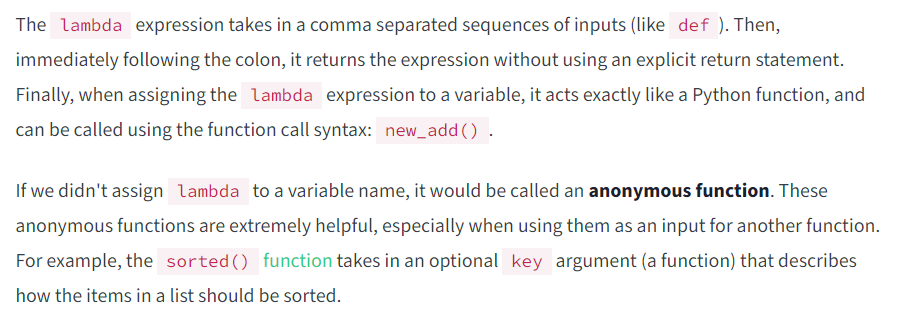

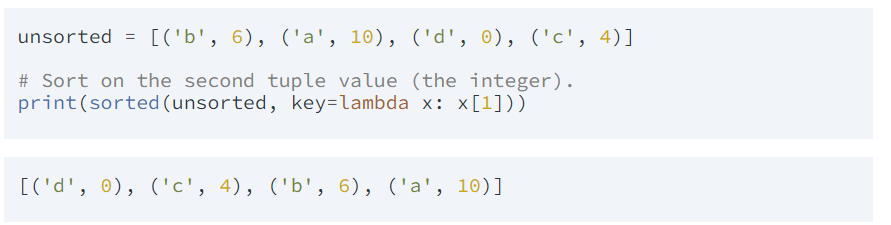

**Task**

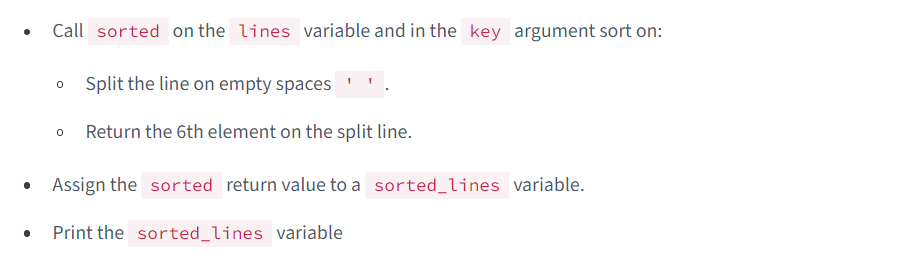

**Answer**

In [2]:
lines = read('example_log.txt')
sorted_lines = sorted(lines, key=lambda x: x.split(' ')[5])
print(sorted_lines)

['233.154.7.24 - - [30/Nov/2017:11:59:54 +0000] "GET /app HTTP/1.1" 404 526 "http://www.cherry.com/main.htm" "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5360 (KHTML, like Gecko) Chrome/13.0.839.0 Safari/5360"\n', '97.218.117.229 - - [30/Nov/2017:11:59:55 +0000] "GET /blog/tags/tag HTTP/1.1" 401 980 "http://herrera-ayala.com/list/wp-content/register.htm" "Opera/9.25.(X11; Linux x86_64; ml-IN) Presto/2.9.163 Version/10.00"\n', '124.66.196.14 - - [30/Nov/2017:11:59:55 +0000] "GET /wp-content/main HTTP/1.1" 401 514 "https://anderson.com/about.html" "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/5321 (KHTML, like Gecko) Chrome/14.0.888.0 Safari/5321"\n', '183.186.55.245 - - [30/Nov/2017:11:59:55 +0000] "GET /tags/tag/wp-content HTTP/1.1" 401 866 "https://www.edwards-santos.org/posts/tags/homepage.html" "Mozilla/5.0 (Windows NT 5.0; uk-UA; rv:1.9.2.20) Gecko/2010-01-29 13:54:00 Firefox/3.8"\n', '70.163.195.102 - - [30/Nov/2017:11:59:55 +0000] "GET /app HTTP/1.1" 401 984 "https://turner.com/homep

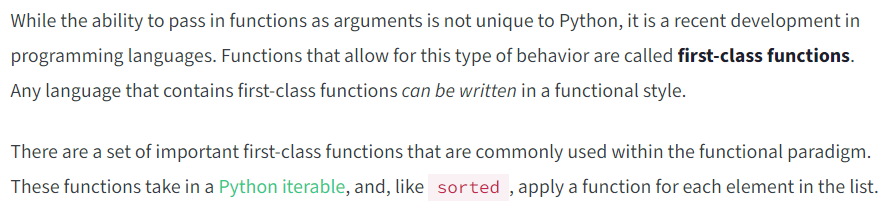

We will examine each of these functions, but they all follow the general form of `function_name(function_to_apply, iterable_of_elements)`.

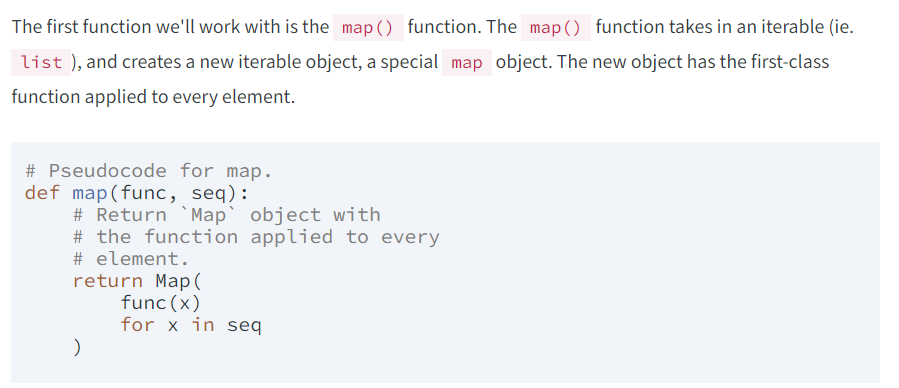

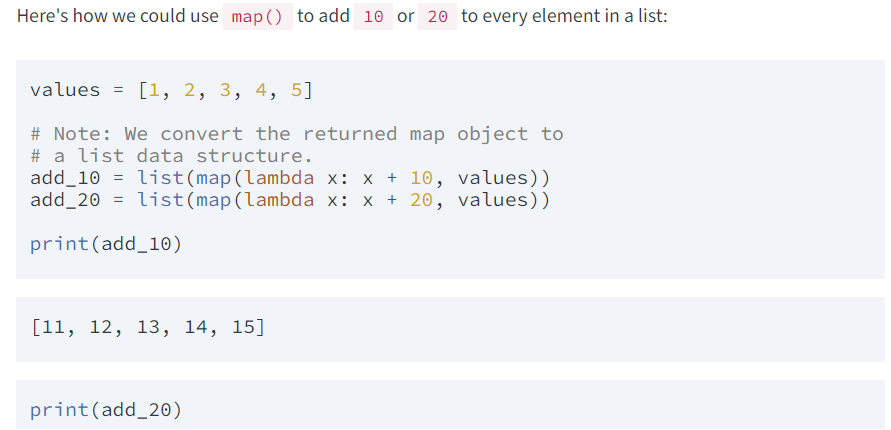

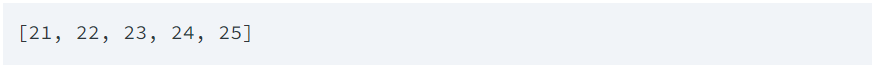

Note that it's important to cast the return value from `map()` as a `list` object. Using the returned `map` object is difficult to work with if we're expecting it to function like a `list`. First, printing it does not show each of its items, and secondly, we can only iterate over it once.

**Task**

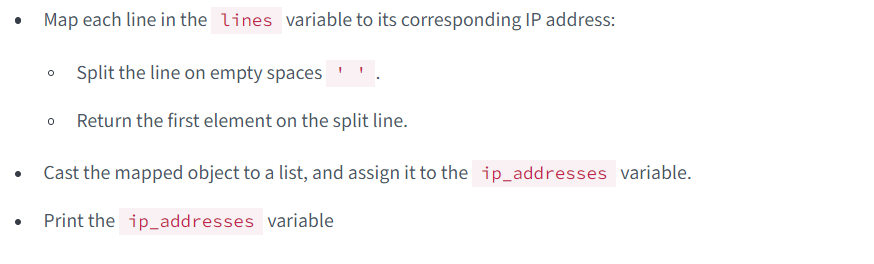

**Answer**

In [3]:
ip_addresses = list(map(lambda x: x.split()[0], lines))
print(ip_addresses)

['200.155.108.44', '36.139.255.202', '50.112.115.219', '204.132.56.4', '233.154.7.24', '241.220.141.78', '191.198.138.97', '172.40.187.145', '225.119.46.80', '97.218.117.229', '4.31.18.29', '124.66.196.14', '103.40.29.163', '215.73.240.165', '236.187.70.48', '183.186.55.245', '74.191.205.248', '70.163.195.102', '94.75.8.56', '246.104.173.21', '216.22.182.174', '182.155.179.87', '127.234.203.89', '228.32.87.90', '68.239.93.169', '250.222.65.128', '139.187.167.17', '160.90.141.49', '218.251.100.198', '197.84.86.14', '26.226.73.67', '33.131.176.95', '113.49.82.235', '248.217.222.140', '206.152.183.187', '50.225.166.157', '103.208.34.36', '236.176.115.9', '5.237.70.145', '180.196.148.112', '164.136.42.138', '4.186.143.85', '56.154.68.234', '82.156.42.167', '224.130.32.21', '216.223.205.192', '108.138.6.235', '54.163.144.75', '75.249.126.226', '26.13.166.162', '101.2.241.170', '193.234.34.65', '28.245.152.27', '25.182.230.255', '59.1.202.120', '118.150.73.152', '254.147.29.31', '7.205.198.1

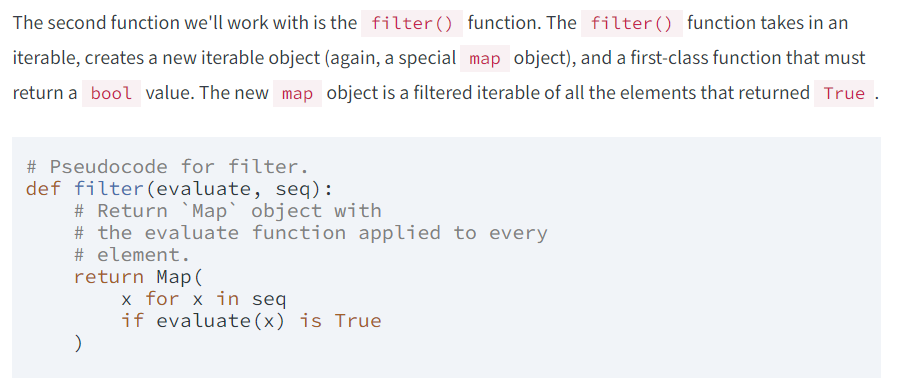

Here's how we could filter odd or even values from a list:

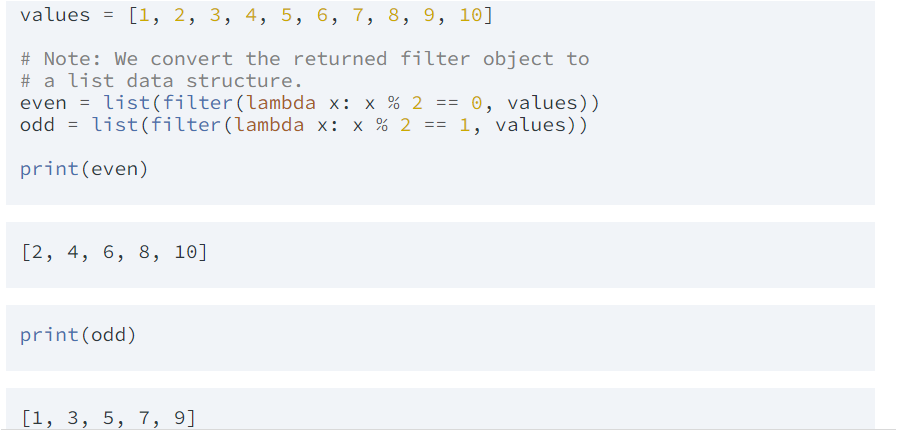

**Task**

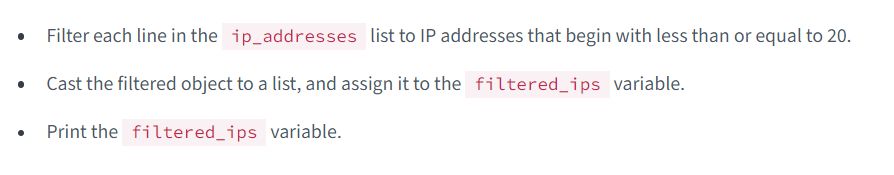

**Answer**

In [4]:
filtered_ips = list(filter(lambda x: int(x.split('.')[0]) <= 20, ip_addresses))
print(filtered_ips)

['4.31.18.29', '5.237.70.145', '4.186.143.85', '7.205.198.134', '2.98.108.99', '20.123.163.219', '17.192.186.123', '19.137.101.141', '5.175.199.96', '20.245.211.32', '19.219.60.226', '3.208.33.106', '16.153.33.150', '19.190.115.218', '0.153.103.45', '12.194.245.108', '2.96.57.90', '4.223.194.188', '6.0.14.128', '12.115.103.178', '5.181.86.241', '3.29.197.164', '1.240.103.127', '9.49.15.69', '9.168.30.192', '1.149.44.202', '6.71.195.192', '2.189.10.201', '7.145.173.45', '0.254.152.197', '5.40.110.55', '5.38.234.254', '17.92.13.79', '12.48.79.71', '11.36.42.176', '6.72.235.92', '4.68.239.140', '1.30.105.246', '0.177.146.178', '3.172.107.70', '2.176.114.240', '20.189.165.83', '5.8.146.209', '14.0.215.165', '9.238.11.123', '6.84.193.66', '5.40.104.181', '18.154.65.30', '2.220.43.118', '8.59.183.202', '10.182.249.118', '16.204.153.175', '11.229.61.134', '16.209.56.250', '5.183.124.144', '0.49.184.87', '18.62.245.157', '10.56.168.95', '0.115.200.130', '18.165.209.126', '6.59.80.184', '1.132.

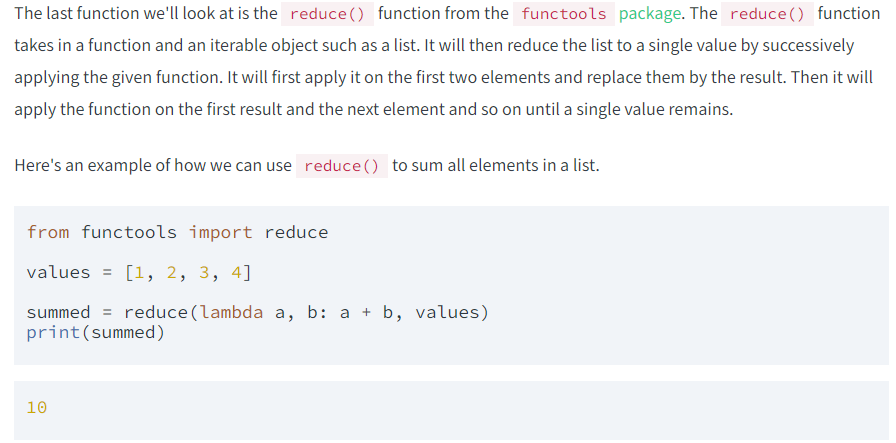

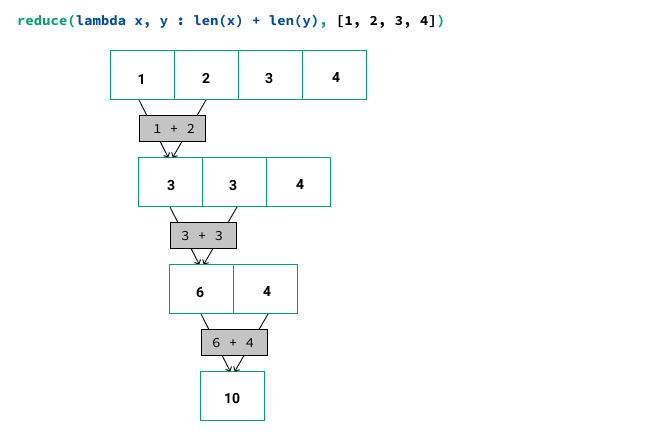

An interesting note to make is that we do **not** have to operate on the second value in the `lambda` expression. For example, we can write a function that always returns the first value of an iterable:

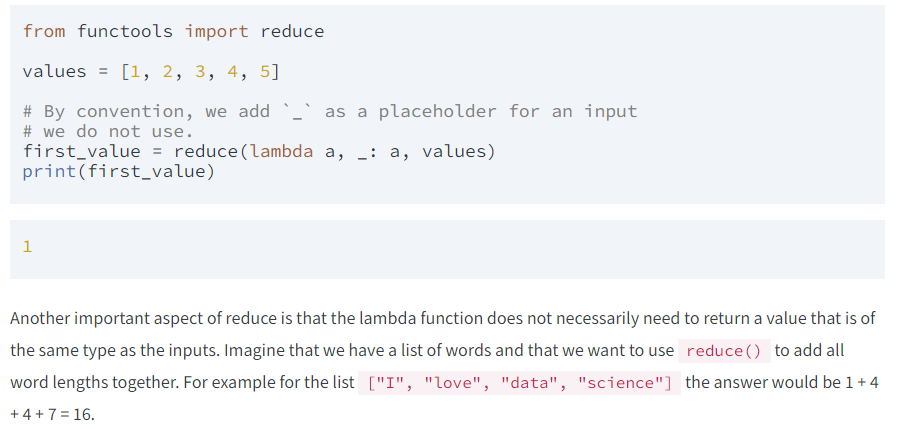

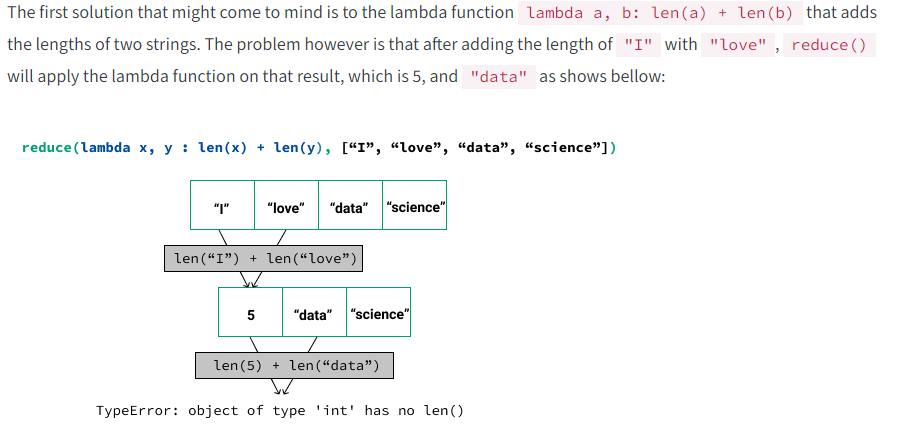

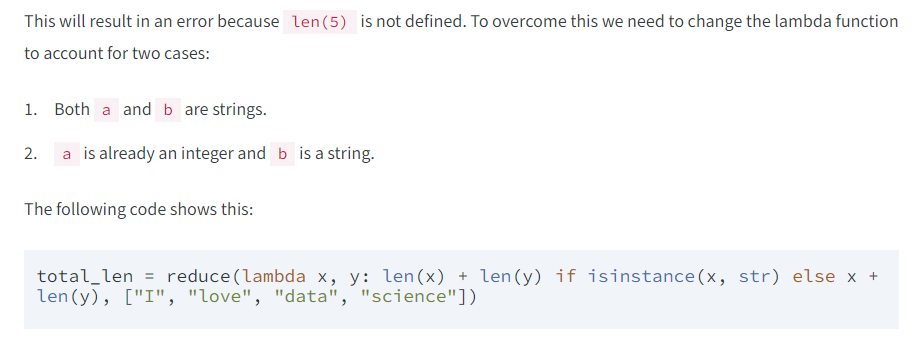

The following diagram shows how this is executed:

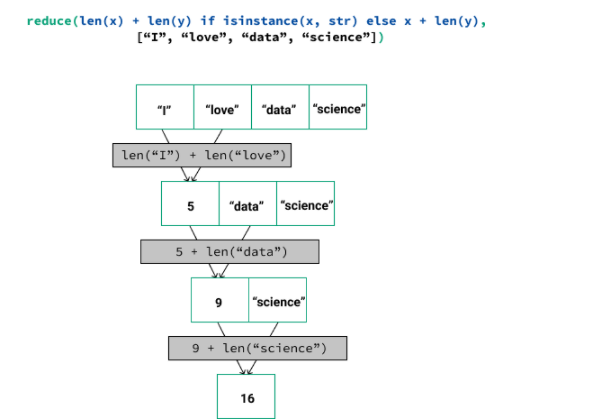

**Task**

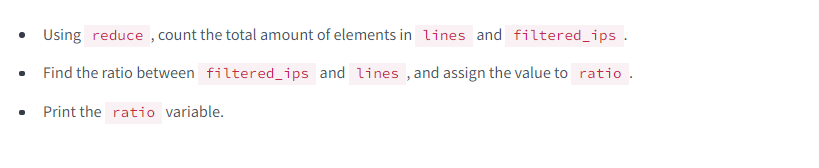

**Answer**

In [5]:
from functools import reduce

count_all = reduce(lambda x, _: 2 if isinstance(x, str) else x + 1, lines)
count_filtered = reduce(lambda x, _: 2 if isinstance(x, str) else x + 1, 
                        filtered_ips)
ratio = count_filtered / count_all

print(ratio)

0.0808


Because we eventually convert to lists, we should rewrite the `map()` and `filter()` functions using list comprehension instead. This is the more pythonic way of writing them, as we are taking advantage of the Python syntax for making lists. Here's how we could translate the previous examples of `map()` and `filter()` to list comprehensions:

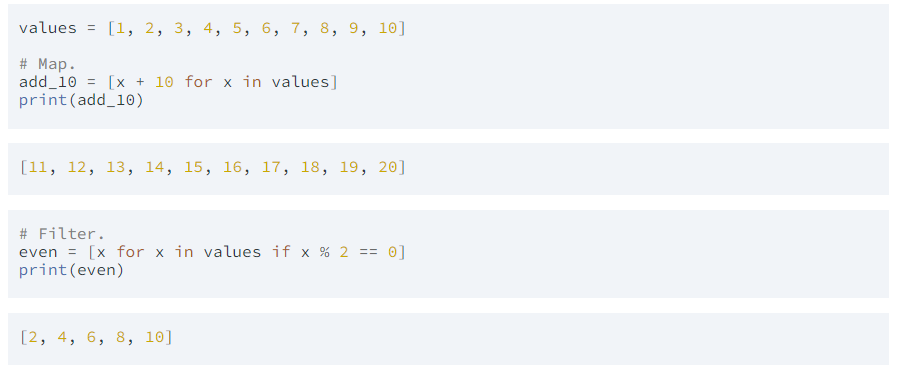

From the examples, we can see that we don't need to add the lambda expressions. If we are looking to add `map()`, or `filter()` functions to our own code, this is usually the recommended way.

**Task**

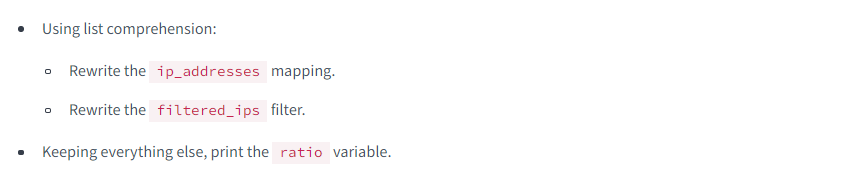

**Answer**

In [7]:
ip_addresses = [line.split()[0] for line in lines]
filtered_ips = [
    ip.split('.')[0]
    for ip in ip_addresses if int(ip.split('.')[0]) <= 20
]
count_all = reduce(lambda x, _: 2 if isinstance(x, str) else x + 1, lines)
count_filtered = reduce(lambda x, _: 2 if isinstance(x, str) else x + 1, filtered_ips)
ratio = count_filtered / count_all
print(ratio)

0.0808


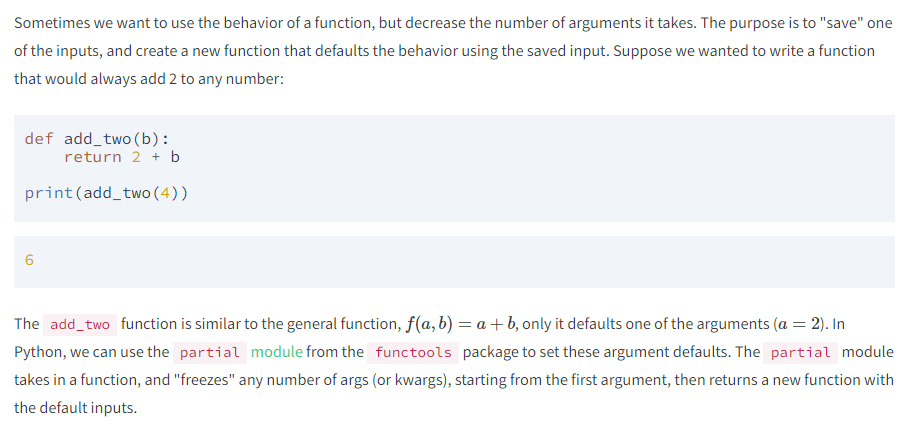

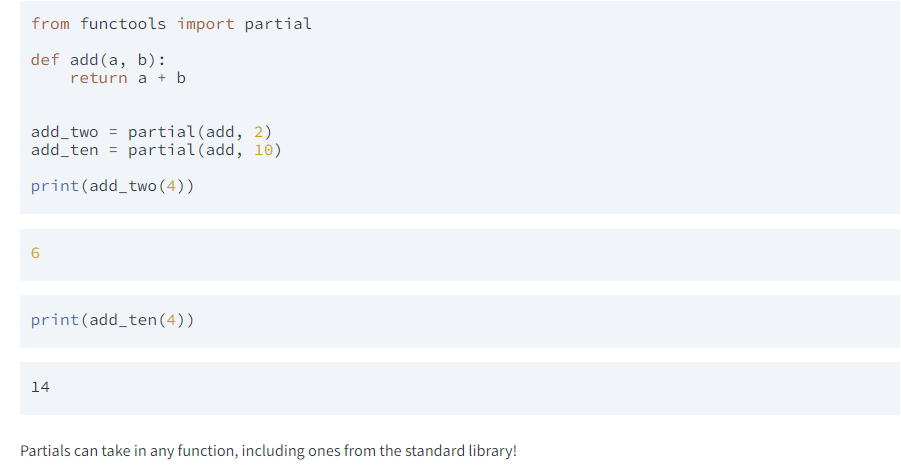

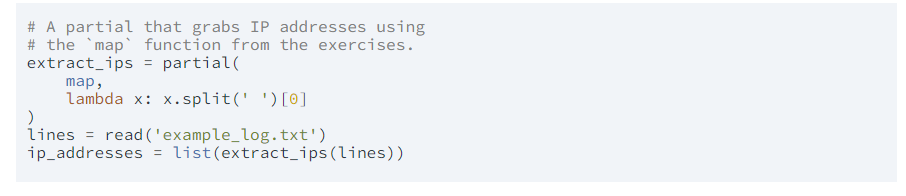

**Task**

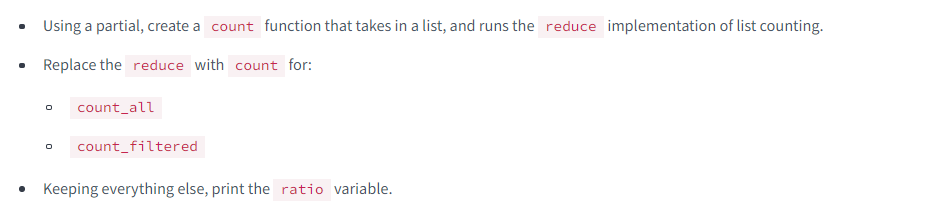

**Answer**

In [8]:
from functools import partial

count = partial(
    reduce,
    lambda x, _: 2 if isinstance(x, str) else x + 1
)

lines = read('example_log.txt')
ip_addresses = [line.split()[0] for line in lines]
filtered_ips = [
    ip.split('.')[0]
    for ip in ip_addresses if int(ip.split('.')[0]) <= 20
]
count_all = count(lines)
count_filtered =  count(filtered_ips)
ratio = count_filtered / count_all
print(ratio)

0.0808


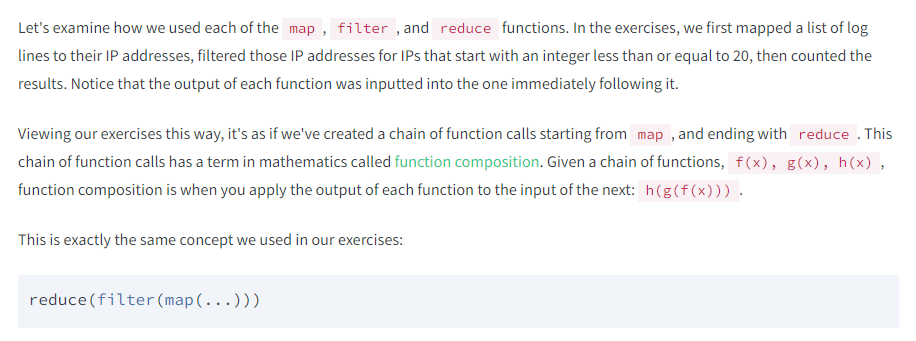

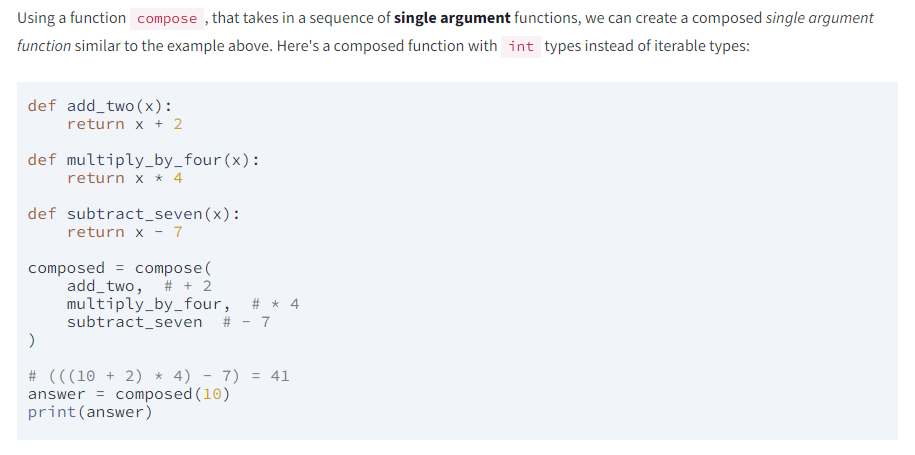

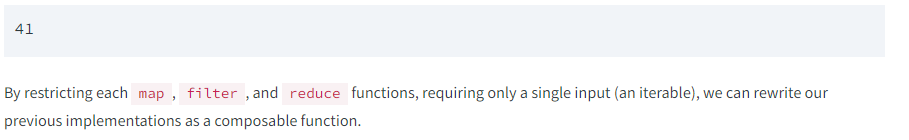

**Task**

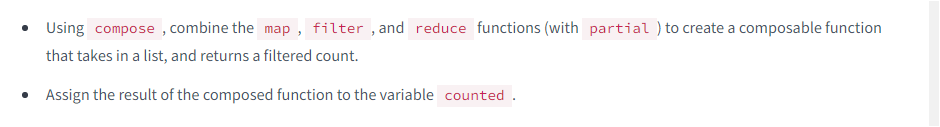

**Answer**

In [12]:
!pip install compose

In [16]:
from compose import compose

In [32]:
extract_ips = partial(
    map,
    lambda x: x.split()[0]
)
filter_ips = partial(
    filter,
    lambda x: int(x.split('.')[0]) <= 20
)
count = partial(
    reduce,
    lambda x, _: 2 if isinstance(x, str) else x + 1
)

composed = compose(
    extract_ips,
    filter_ips,
    count
)

In [35]:
counted = composed(lines)

list

In this file we introduced the paradigm of functional programming. We learned about the lambda expression in Python, the important functional functions, and the concept of partials. Finally, we finished the discussion with functional composition, and demonstrated that we can compose a sequence of functions to create a single function.

In the next file we will expand on the concept of functional programming, and explore how composition naturally creates a data pipeline. We will build a sequence of tasks, and complete a pipeline that will transform raw data into summarized data.